In [1]:
# install scanpy
! pip install scanpy    

  Obtaining dependency information for scanpy from https://files.pythonhosted.org/packages/23/8d/9325c37cf2cd9f88b70561eacbaae18f60ca143331369bc2abd0c0f34b7a/scanpy-1.10.3-py3-none-any.whl.metadata
  Obtaining dependency information for anndata>=0.8 from https://files.pythonhosted.org/packages/ca/a2/52b1fb4d7bbb022929300a4351c363958c1377b33c0d0be94f803987af7a/anndata-0.10.9-py3-none-any.whl.metadata
  Obtaining dependency information for legacy-api-wrap>=1.4 from https://files.pythonhosted.org/packages/97/08/eaf39f00542e4181b65617805f116a0d38daec98d0dce36ec94327ca8fc4/legacy_api_wrap-1.4-py3-none-any.whl.metadata
  Obtaining dependency information for natsort from https://files.pythonhosted.org/packages/ef/82/7a9d0550484a62c6da82858ee9419f3dd1ccc9aa1c26a1e43da3ecd20b0d/natsort-8.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for pynndescent>=0.5 from https://files.pythonhosted.org/packages/d2/53/d23a97e0a2c690d40b165d1062e2c4ccc796be458a1ce59f6ba030434663/pynndescent-

In [2]:
# Main packages
import scanpy as sc

# other packages
import os


#package.module.function()

# Figure parameters
sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.logging.print_header()

scanpy==1.10.3 anndata==0.10.9 umap==0.5.6 numpy==1.24.3 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.4.2 statsmodels==0.14.0 pynndescent==0.5.13


In [3]:
adata = sc.datasets.pbmc3k()
adata

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [13]:
file_path = "C:\\Projects\\scRNA_Seq_Scanpy\\filtered_gene_bc_matrices\\hg19\\"

In [14]:
print(file_path)    

C:\Projects\scRNA_Seq_Scanpy\filtered_gene_bc_matrices\hg19\


In [15]:
# Check directory contents
os.listdir(file_path)   


['barcodes.tsv', 'genes.tsv', 'matrix.mtx']

In [16]:
# Load files into AnnData object
adata = sc.read_10x_mtx(file_path, var_names='gene_symbols', cache=True)



In [17]:
adata


AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [18]:
# shape of the data 
adata.shape 

(2700, 32738)

In [19]:
# number of genes   
adata.var_names.size    


32738

In [20]:
# number of cells   
adata.obs_names.size    

2700

In [21]:
# number of counts  
adata.X.sum()   

6390631.0

In [22]:
# number of counts per cell 
adata.X.sum(axis=1) 

matrix([[2421.],
        [4903.],
        [3149.],
        ...,
        [1684.],
        [1024.],
        [1985.]], dtype=float32)

In [23]:
# number of counts per gene 
adata.X.sum(axis=0) 

matrix([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
# information about the data    
adata.var.head()

,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945


In [25]:
# information about the data    
adata.obs.head()    

""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1


In [26]:
# create a shallow dataframe (No changes to original dataframe)  
adata.to_df().head()    

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


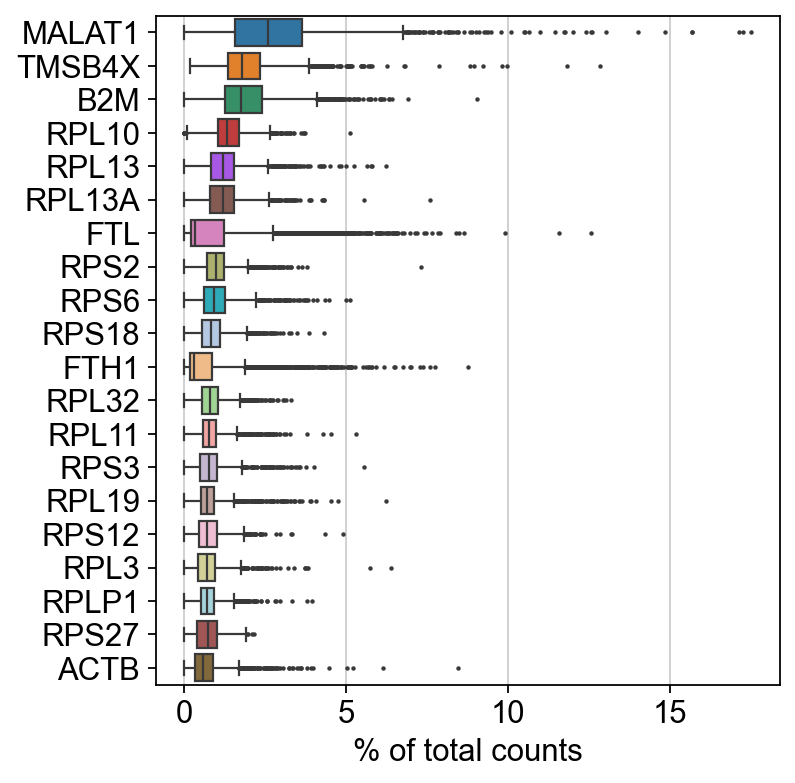

In [27]:
# The n_top genes with the highest mean fraction over all cells 
sc.pl.highest_expr_genes(adata, n_top=20)   


In [28]:
# copy into a new AnnData object "adata_wQC"
adata_wQC = adata.copy()    


In [29]:
sc.pp.calculate_qc_metrics(adata_wQC, percent_top=None, log1p=False, inplace=True)

In [30]:
adata_wQC   

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [31]:
#n_genes_by_counts - The number of genes with at least 1 count in a cell
# total_counts - Total number of counts for a cell

adata_wQC.obs


,n_genes_by_counts,total_counts
AAACATACAACCAC-1,781,2421.0
AAACATTGAGCTAC-1,1352,4903.0
AAACATTGATCAGC-1,1131,3149.0
AAACCGTGCTTCCG-1,960,2639.0
AAACCGTGTATGCG-1,522,981.0
...,...,...
TTTCGAACTCTCAT-1,1155,3461.0
TTTCTACTGAGGCA-1,1227,3447.0
TTTCTACTTCCTCG-1,622,1684.0
TTTGCATGAGAGGC-1,454,1024.0


In [32]:
adata_wQC.var

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
MIR1302-10,ENSG00000243485,0,0.0,100.0,0.0
FAM138A,ENSG00000237613,0,0.0,100.0,0.0
OR4F5,ENSG00000186092,0,0.0,100.0,0.0
RP11-34P13.7,ENSG00000238009,0,0.0,100.0,0.0
RP11-34P13.8,ENSG00000239945,0,0.0,100.0,0.0
...,...,...,...,...,...
AC145205.1,ENSG00000215635,0,0.0,100.0,0.0
BAGE5,ENSG00000268590,0,0.0,100.0,0.0
CU459201.1,ENSG00000251180,0,0.0,100.0,0.0
AC002321.2,ENSG00000215616,0,0.0,100.0,0.0


In [33]:
adata_wQC.var_names

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)

In [34]:
adata_wQC.var_names.str.startswith('MT-')

array([False, False, False, ..., False, False, False])

In [35]:
# annotate mitochondrial genes as 'mt' and calculate qc metrics
adata_wQC.var['mt'] = adata_wQC.var_names.str.startswith('MT-') 


In [36]:
adata_wQC.var['mt']

MIR1302-10      False
FAM138A         False
OR4F5           False
RP11-34P13.7    False
RP11-34P13.8    False
                ...  
AC145205.1      False
BAGE5           False
CU459201.1      False
AC002321.2      False
AC002321.1      False
Name: mt, Length: 32738, dtype: bool

In [38]:
# print var datafram columns    
adata_wQC.var  

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mt
MIR1302-10,ENSG00000243485,0,0.0,100.0,0.0,False
FAM138A,ENSG00000237613,0,0.0,100.0,0.0,False
OR4F5,ENSG00000186092,0,0.0,100.0,0.0,False
RP11-34P13.7,ENSG00000238009,0,0.0,100.0,0.0,False
RP11-34P13.8,ENSG00000239945,0,0.0,100.0,0.0,False
...,...,...,...,...,...,...
AC145205.1,ENSG00000215635,0,0.0,100.0,0.0,False
BAGE5,ENSG00000268590,0,0.0,100.0,0.0,False
CU459201.1,ENSG00000251180,0,0.0,100.0,0.0,False
AC002321.2,ENSG00000215616,0,0.0,100.0,0.0,False


In [39]:
sc.pp.calculate_qc_metrics(adata_wQC, percent_top=None, log1p=False, inplace=True) 

In [40]:
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [43]:
sc.pp.calculate_qc_metrics(adata_wQC, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [44]:
adata_wQC   

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

c:\Users\shaki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


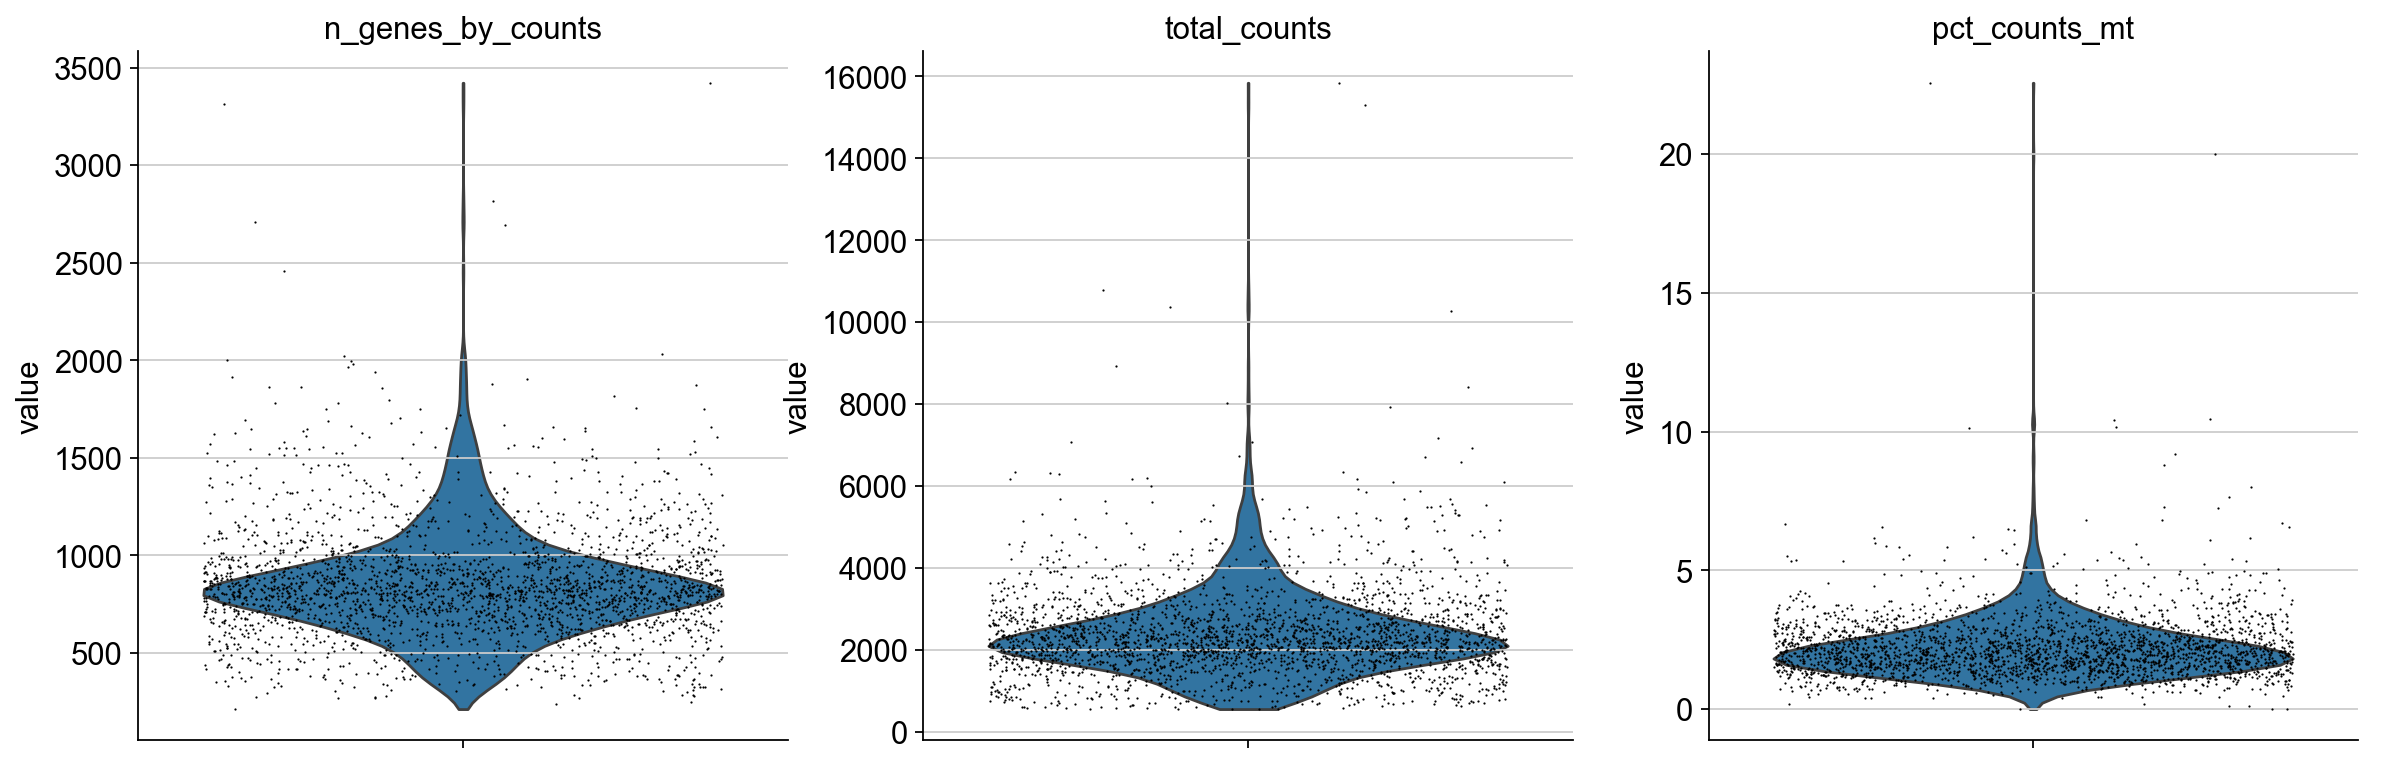

In [46]:
# plot violin plot of number of genes by counts 
sc.pl.violin(adata_wQC, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)



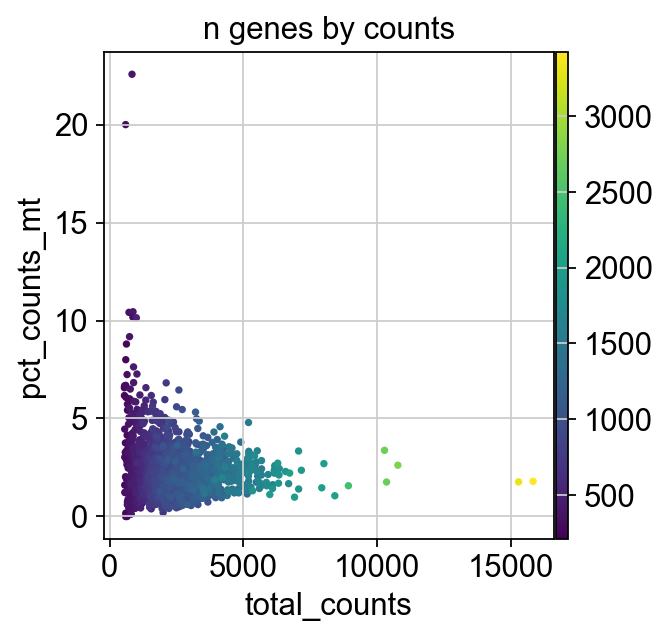

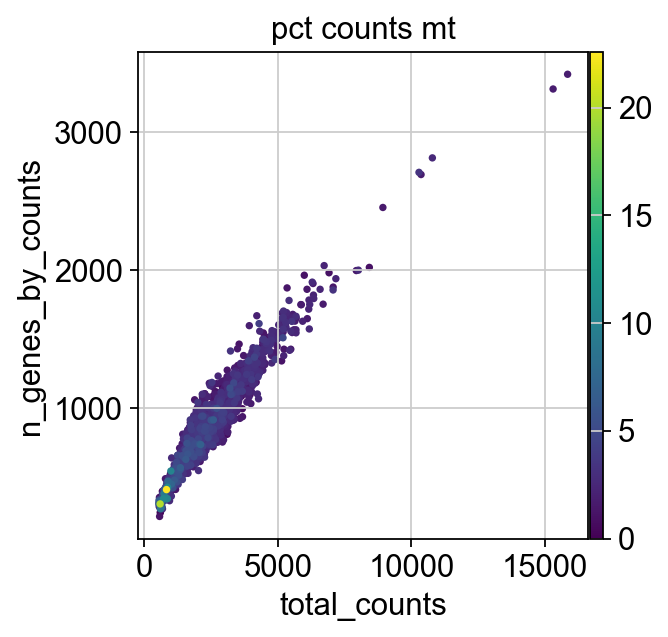

In [47]:
sc.pl.scatter(adata_wQC, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(adata_wQC, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

In [48]:
# copy into a new AnnData object "adata_wQC_filt"
adata_wQC_filt = adata_wQC.copy()
print(adata_wQC)
sc.pp.filter_cells(adata_wQC_filt, min_genes=200)
print(adata_wQC_filt)
adata_wQC_filt = adata_wQC_filt[adata_wQC_filt.obs.pct_counts_mt < 5, :]
print(adata_wQC_filt)

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
View of AnnData object with n_obs × n_vars = 2643 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'


In [49]:
print(adata_wQC_filt)
adata_wQC_filt = adata_wQC_filt[adata_wQC_filt.obs.n_genes_by_counts < 2500, :]
print(adata_wQC_filt)

View of AnnData object with n_obs × n_vars = 2643 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
View of AnnData object with n_obs × n_vars = 2638 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'


In [50]:
print(adata_wQC_filt)
sc.pp.filter_genes(adata_wQC_filt, min_cells=3)
print(adata_wQC_filt)

View of AnnData object with n_obs × n_vars = 2638 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
AnnData object with n_obs × n_vars = 2638 × 13656
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'


c:\Users\shaki\anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:283: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


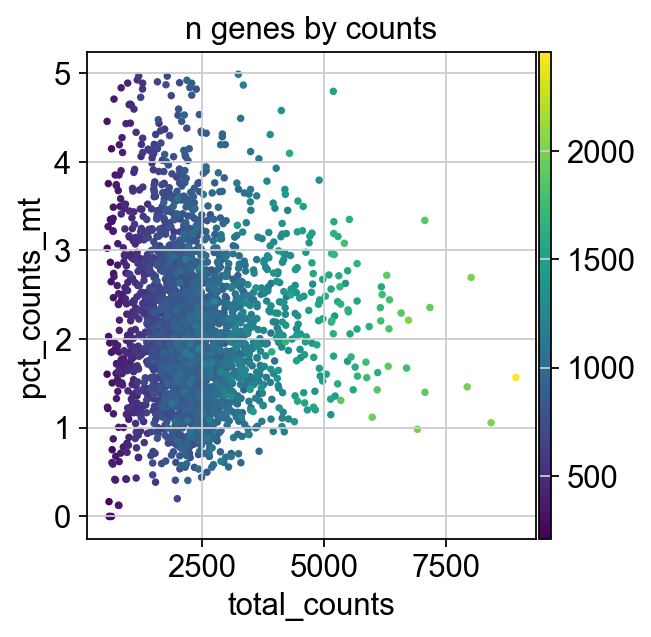

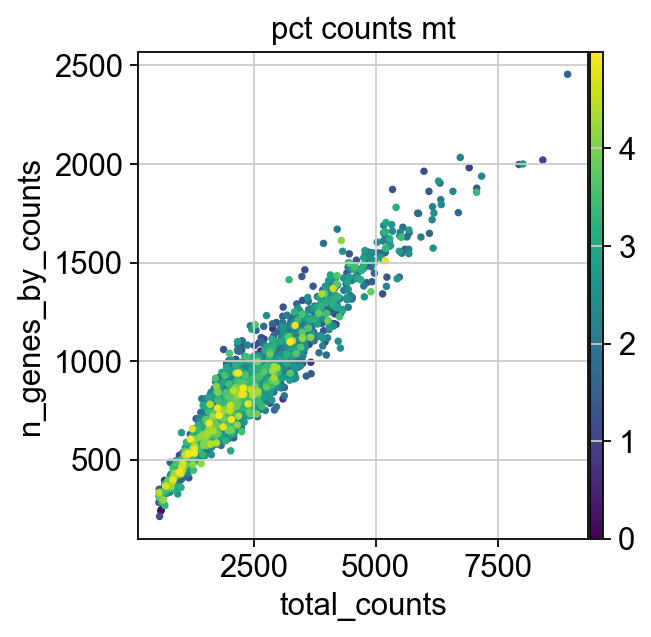

In [51]:
sc.pl.scatter(adata_wQC_filt, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(adata_wQC_filt, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

In [52]:
#copy into a new AnnData object "norm_data"
norm_data = adata_wQC_filt.copy()

sc.pp.normalize_total(norm_data, target_sum=1e4)
norm_data

AnnData object with n_obs × n_vars = 2638 × 13656
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'

In [53]:
#log n+1 transform
sc.pp.log1p(norm_data)

In [54]:
norm_data

AnnData object with n_obs × n_vars = 2638 × 13656
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'
    uns: 'log1p'

In [55]:
# copy into a new AnnData object "HVG_data"
HVG_data = norm_data.copy()
sc.pp.highly_variable_genes(HVG_data, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [56]:
print(norm_data)
print("#######################################")
print(HVG_data)

AnnData object with n_obs × n_vars = 2638 × 13656
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'
    uns: 'log1p'
#######################################
AnnData object with n_obs × n_vars = 2638 × 13656
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [57]:
HVG_data.var['highly_variable']

AL627309.1       False
AP006222.2       False
RP11-206L10.2    False
RP11-206L10.9    False
LINC00115        False
                 ...  
AC145212.1       False
AL592183.1       False
AL354822.1       False
PNRC2-1          False
SRSF10-1         False
Name: highly_variable, Length: 13656, dtype: bool

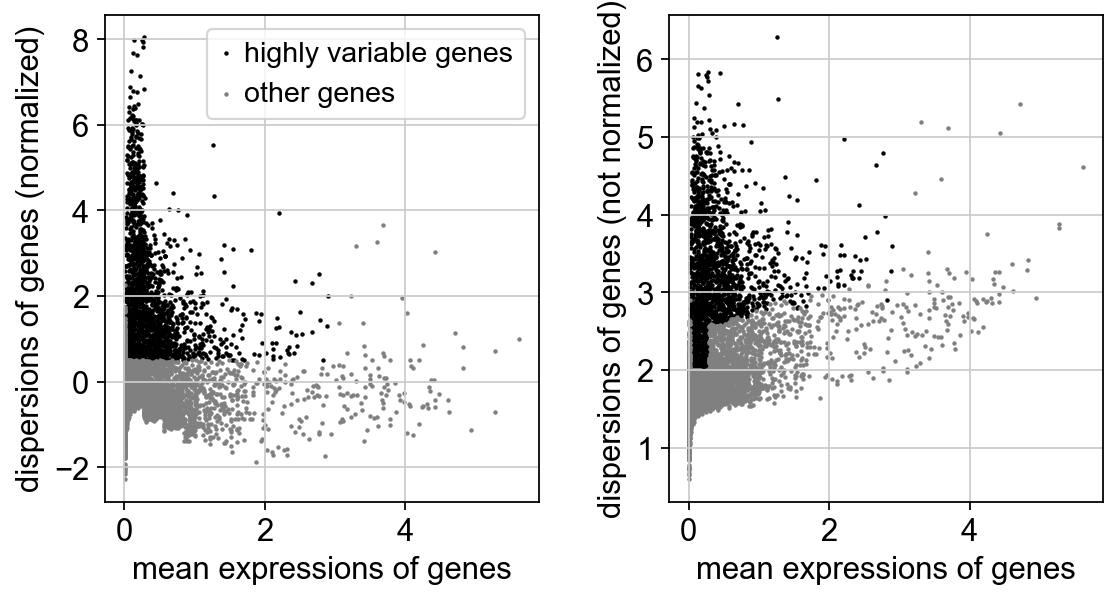

In [58]:
sc.pl.highly_variable_genes(HVG_data)

In [59]:
# now we will filter out the highly variable genes
HVG_data = HVG_data[:, HVG_data.var.highly_variable]
HVG_data

View of AnnData object with n_obs × n_vars = 2638 × 1826
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

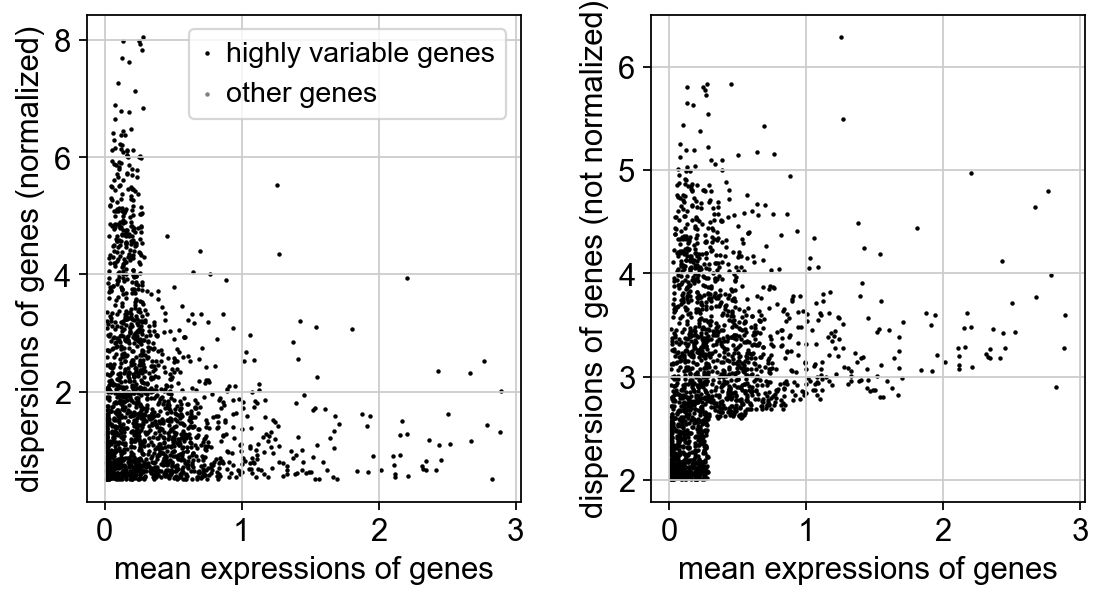

In [60]:
sc.pl.highly_variable_genes(HVG_data)

In [61]:
# copy into a new AnnData object "pcHVG_data"
pcHVG_data = HVG_data.copy()

# scale to unit variance for PCA, clip values exceeding standard deviation 10
sc.pp.scale(pcHVG_data, max_value=10)

In [62]:
sc.tl.pca(pcHVG_data)

In [63]:
print(pcHVG_data)

AnnData object with n_obs × n_vars = 2638 × 1826
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'


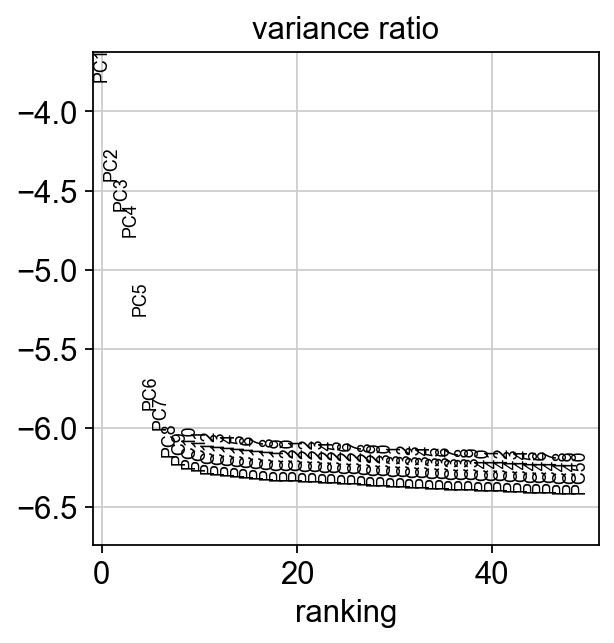

In [64]:
# We will now plot 50 PCs that are contributing to the variance and choose the number of PCs 
# Basically, when the curve starts to flatten that may be roughly be the number of PCs we could choose
sc.pl.pca_variance_ratio(pcHVG_data, log=True, n_pcs=50)

c:\Users\shaki\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


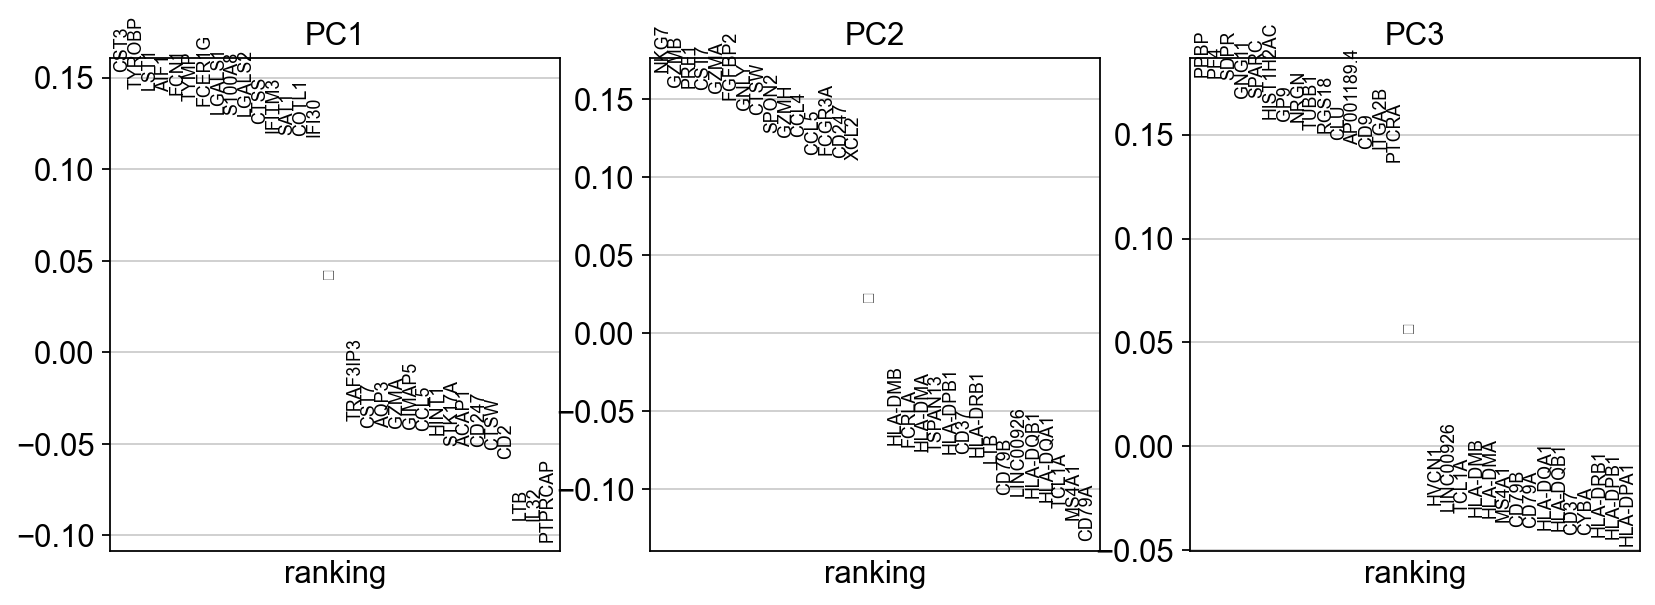

In [65]:
sc.pl.pca_loadings(pcHVG_data) 

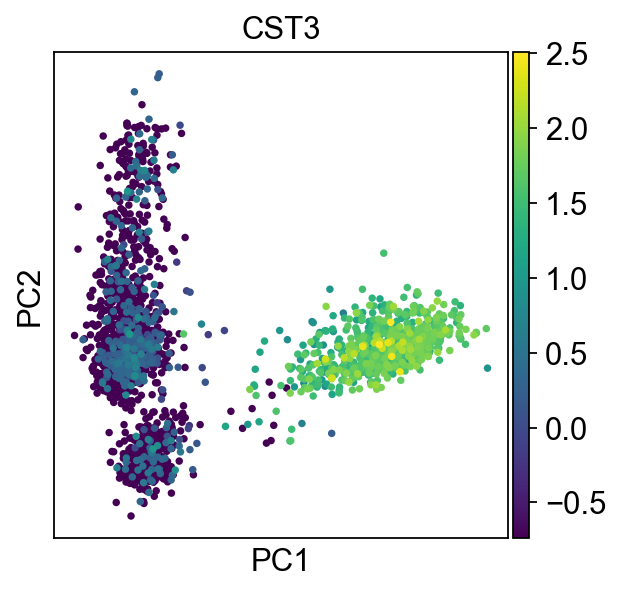

In [66]:
sc.pl.pca(pcHVG_data, color='CST3')

In [67]:
sc.pp.neighbors(pcHVG_data, n_pcs=15)

In [68]:
pcHVG_data

AnnData object with n_obs × n_vars = 2638 × 1826
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [69]:
pcHVG_data.obsp

PairwiseArrays with keys: distances, connectivities

In [70]:
# obsp attribute contains two keys: 'distances' and 'connectivities', each key has a value that is a sparse matrix.

for key, value in pcHVG_data.obsp.items():
    print("key: ", key)
    print("value: ", value)

key:  distances
value:    (0, 518)	3.8619964122772217
  (0, 474)	4.195127010345459
  (0, 1769)	4.374928951263428
  (0, 963)	4.397738456726074
  (0, 305)	4.436649799346924
  (0, 1980)	4.535576343536377
  (0, 703)	4.733348369598389
  (0, 1345)	4.794648170471191
  (0, 136)	4.820720672607422
  (0, 2148)	4.8445000648498535
  (0, 2165)	4.844822883605957
  (0, 671)	4.900251865386963
  (0, 618)	4.94859504699707
  (0, 1240)	4.99448299407959
  (1, 165)	4.280962944030762
  (1, 2344)	5.474232196807861
  (1, 999)	5.733234882354736
  (1, 930)	5.7501935958862305
  (1, 1054)	5.832787036895752
  (1, 10)	5.912156581878662
  (1, 351)	5.943183422088623
  (1, 561)	6.011016845703125
  (1, 107)	6.1563239097595215
  (1, 1810)	6.190812110900879
  (1, 1638)	6.1986083984375
  :	:
  (2636, 2533)	4.643158435821533
  (2636, 2173)	4.6446967124938965
  (2636, 683)	4.6983513832092285
  (2636, 249)	4.815821170806885
  (2636, 854)	4.8526177406311035
  (2636, 1422)	4.8946733474731445
  (2636, 2200)	4.9561028480529785
  (

In [71]:
umHVG_data = pcHVG_data.copy()
sc.tl.umap(umHVG_data)

In [72]:
umHVG_data

AnnData object with n_obs × n_vars = 2638 × 1826
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [73]:
print(umHVG_data.obsm['X_pca'])

[[-4.2898154   0.45749608 -0.14603421 ...  1.3848844  -1.1965226
   2.760039  ]
 [-0.47379234 -5.3313103  -2.3747857  ... -0.16764054  3.4249935
  -1.5010487 ]
 [-2.0312173   2.3861947   0.5954336  ...  2.0175424   1.4611923
  -2.2557774 ]
 ...
 [-2.5571022  -7.470688   -1.9865292  ... -1.1252701  -1.100339
   0.7033908 ]
 [-2.9093685  -6.743697   -1.3092628  ... -0.43649566 -2.0359435
   1.5169269 ]
 [-2.4489806  -0.9688834   0.35676077 ... -0.6139389  -0.7321112
  -1.0353842 ]]


In [74]:
print(umHVG_data.obsm['X_umap'])

[[ 9.39418     9.919283  ]
 [ 7.9839873   0.7936718 ]
 [11.678719   11.60862   ]
 ...
 [10.277049    0.18774416]
 [ 9.558275   -0.86311865]
 [10.064024    9.489244  ]]


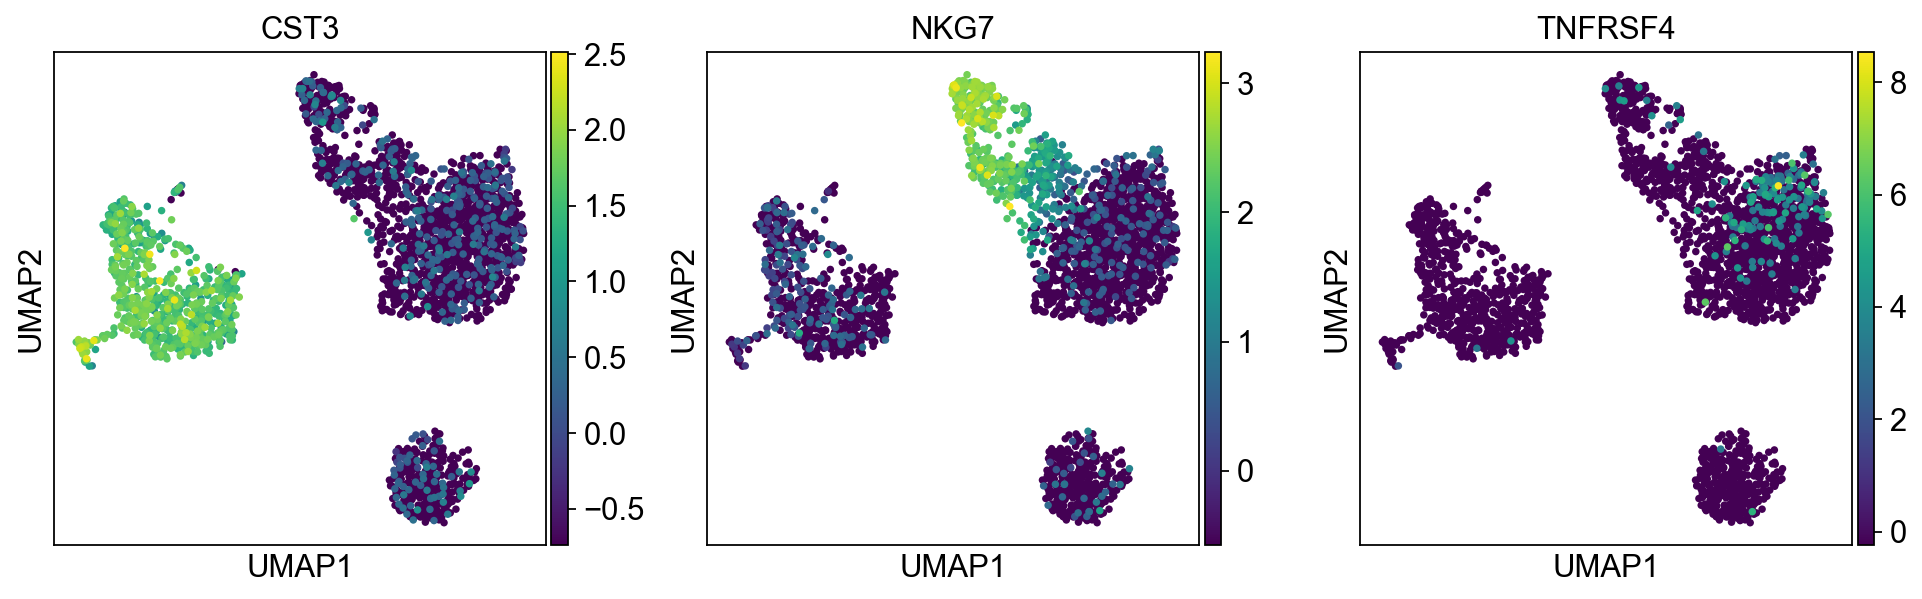

In [75]:
# the below command will use the data stored in the 'X_umap' by default. 
sc.pl.umap(umHVG_data,color=['CST3', 'NKG7', 'TNFRSF4'])